<a href="https://colab.research.google.com/github/software-development-course-2025/python-week-7-assignment/blob/main/iris_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Dataset - Basic Data Exploration

This notebook performs initial exploration of the classic Iris dataset.  
It includes data loading, summary statistics, grouping, and early observations.


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


## Descriptive Statistics


In [2]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Mean Measurements per Species


In [3]:
df.groupby("species", observed=True).mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## 🔍 Observations

- *Setosa* has significantly smaller petal length and width.
- *Virginica* generally shows the largest values for most features.
- No missing values found, and data types are consistent.

This prepares the ground for visualizations in the next step.


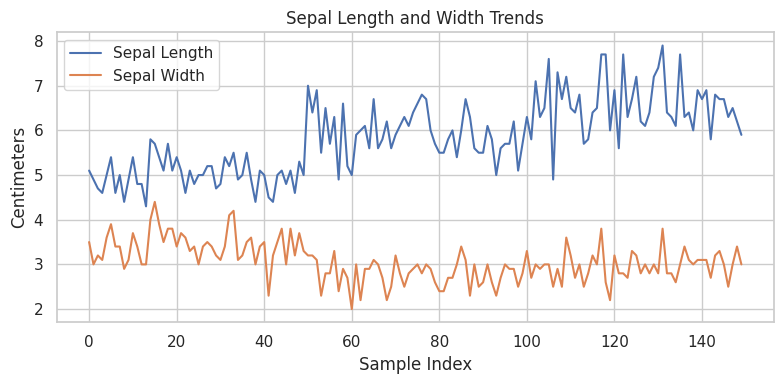

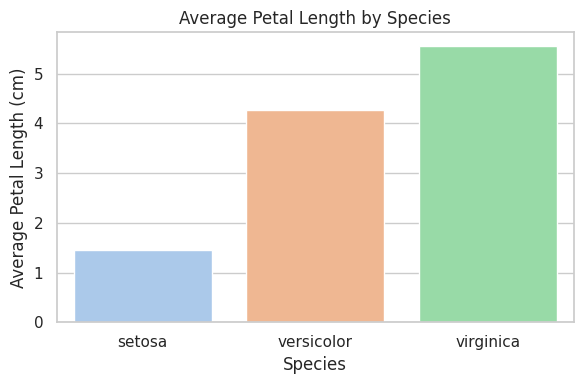

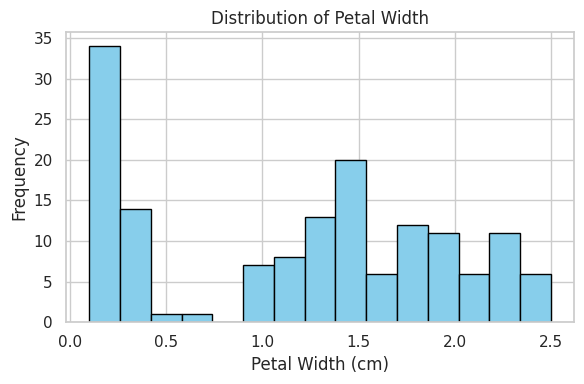

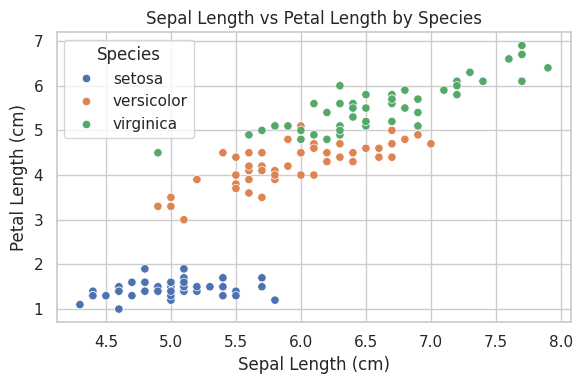

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for nicer visuals
sns.set(style="whitegrid")

# 1. Line chart (simulated trend using sample index)
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['sepal length (cm)'], label='Sepal Length')
plt.plot(df.index, df['sepal width (cm)'], label='Sepal Width')
plt.title('Sepal Length and Width Trends')
plt.xlabel('Sample Index')
plt.ylabel('Centimeters')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Bar chart (average petal length by species)
mean_petal_length = df.groupby('species', observed=True)['petal length (cm)'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(data=mean_petal_length, x='species', y='petal length (cm)', palette='pastel', hue='species', legend=False)
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.tight_layout()
plt.show()

# 3. Histogram (distribution of petal width)
plt.figure(figsize=(6, 4))
plt.hist(df['petal width (cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 4. Scatter plot (sepal length vs petal length by species)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='deep')
plt.title('Sepal Length vs Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.tight_layout()
plt.show()
